In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\shras\Desktop\project\OCCURRENCE_PUBLIC.csv", low_memory=False)

In [2]:
print(df.dtypes)

OccID                                int64
OccNo                               object
OccClassID                           int64
OccClassID_DisplayEng               object
OccClassID_DisplayFre               object
                                    ...   
DistanceToCrossing_Miles           float64
TrespasserVehicleInvolvedInd       float64
TrespasserVehicleTypeID            float64
TrespasserVehicleTypeDisplayEng     object
TrespasserVehicleTypeDisplayFre     object
Length: 345, dtype: object


In [3]:
df.isnull().sum()

OccID                                  0
OccNo                                  0
OccClassID                             0
OccClassID_DisplayEng              11572
OccClassID_DisplayFre                  0
                                   ...  
DistanceToCrossing_Miles           68337
TrespasserVehicleInvolvedInd       67282
TrespasserVehicleTypeID            68615
TrespasserVehicleTypeDisplayEng    68615
TrespasserVehicleTypeDisplayFre    68615
Length: 345, dtype: int64

In [4]:
french_columns = [col for col in df.columns if "Fre" in col]
len(french_columns)

71

In [5]:
df1=df.drop(columns=french_columns)
df1

,OccID,OccNo,OccClassID,OccClassID_DisplayEng,OccDate,OccYear,OccTime,TimeZoneID,TimeZoneID_DisplayEng,OccurrenceTypeID,...,FenceConditionID_DisplayEng,SignIND,SignConditionID,SignConditionID_DisplayEng,PointOfEntryID,PointOfEntryID_DisplayEng,DistanceToCrossing_Miles,TrespasserVehicleInvolvedInd,TrespasserVehicleTypeID,TrespasserVehicleTypeDisplayEng
0,135567,R25S0002,5,5,1/10/2025 9:55:00 AM,2025,955.0,11.0,CST,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135566,R25Q0002,5,5,1/4/2025 11:30:00 AM,2025,1130.0,4.0,EDT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,135565,R25E0005,5,5,1/8/2025 11:42:00 PM,2025,2342.0,5.0,MDT,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135564,R25C0001,5,5,1/6/2025 8:30:00 AM,2025,830.0,10.0,MST,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,135563,R25T0007,5,5,1/7/2025 7:45:00 AM,2025,745.0,2.0,EST,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68775,27798,R83T2982,11,NaN,1/3/1983 12:00:00 AM,1983,0.0,14.0,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68776,27797,R83C1575,11,NaN,1/3/1983 12:00:00 AM,1983,1110.0,14.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68777,27796,R83M0558,11,NaN,1/3/1983 12:00:00 AM,1983,1552.0,14.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68778,27795,R83M0557,11,NaN,1/2/1983 12:00:00 AM,1983,1415.0,14.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1['Class1No'] = df1['Class1No'].replace(r'^\s*$', pd.NA, regex=True)

In [9]:
num_duplicates = df1.duplicated(subset='OccID').sum()

print(f"Number of duplicates based on OccID: {num_duplicates}")

Number of duplicates based on OccID: 6419


In [10]:
# Dropping duplicates based on the 'OccID' column
data_cleaned_1 = df1.drop_duplicates(subset='OccID')

# Verifying the shape of the cleaned dataset
data_cleaned_1.shape

(62361, 274)

EDA
https://www.tsb.gc.ca/eng/lois-acts/evenements-occurrences.html

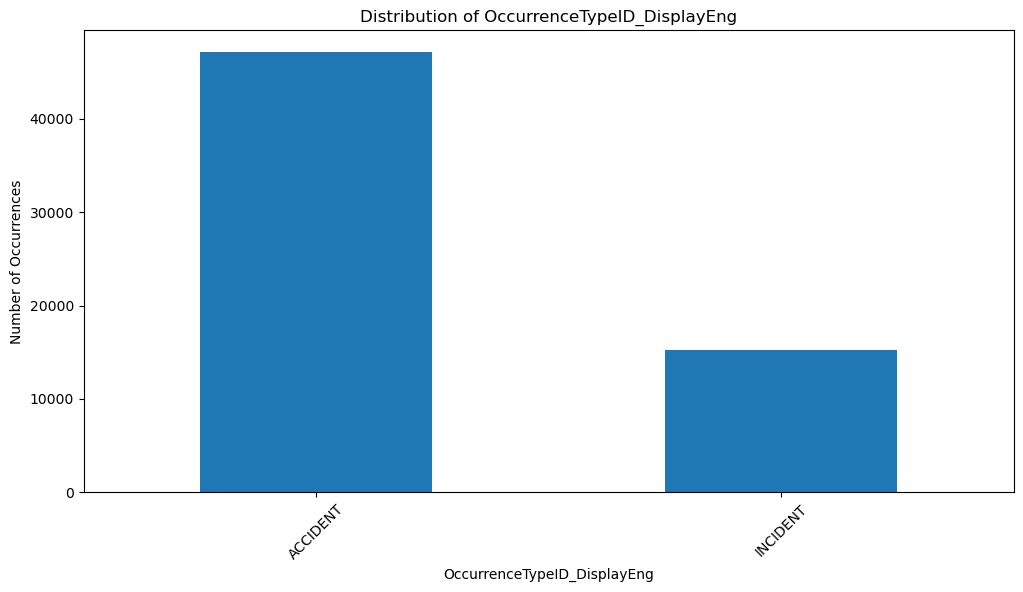

In [12]:
import matplotlib.pyplot as plt

# Setting up data for bar graphs
columns_to_plot = ['OccurrenceTypeID_DisplayEng']

for column in columns_to_plot:
    # Count occurrences for each category
    value_counts = data_cleaned_1[column].value_counts()

    # Plotting the bar chart
    plt.figure(figsize=(12, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.show()


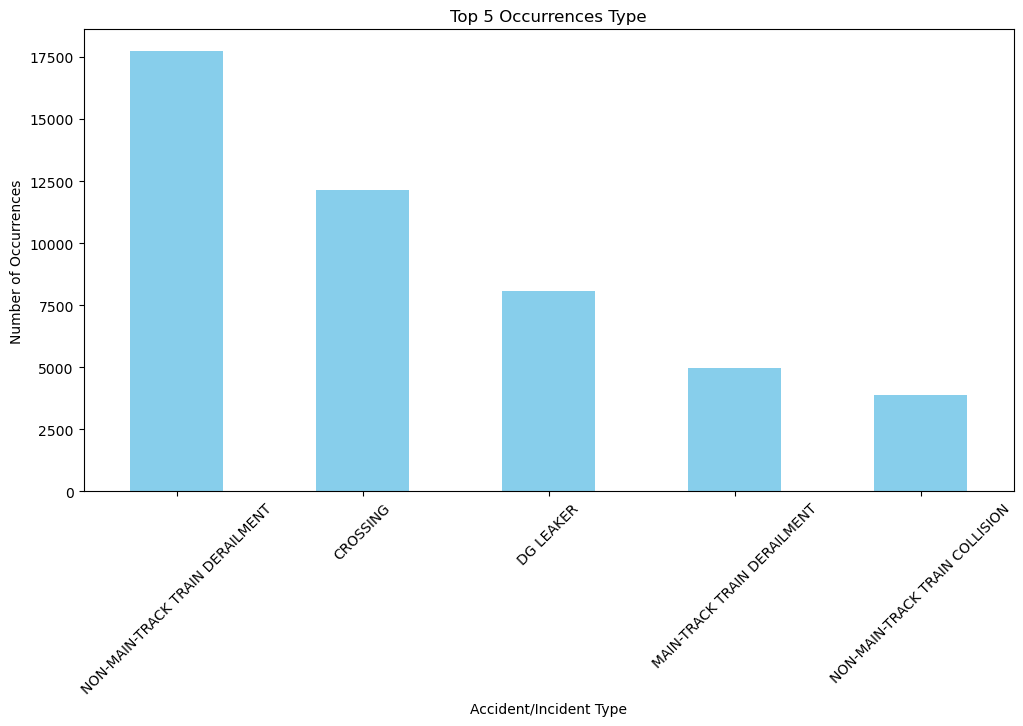

In [13]:
acc_inc_counts = data_cleaned_1['AccIncTypeID_DisplayEng'].value_counts().head(5)

# Plotting the bar chart for the top 5
plt.figure(figsize=(12, 6))
acc_inc_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Occurrences Type')
plt.xlabel('Accident/Incident Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

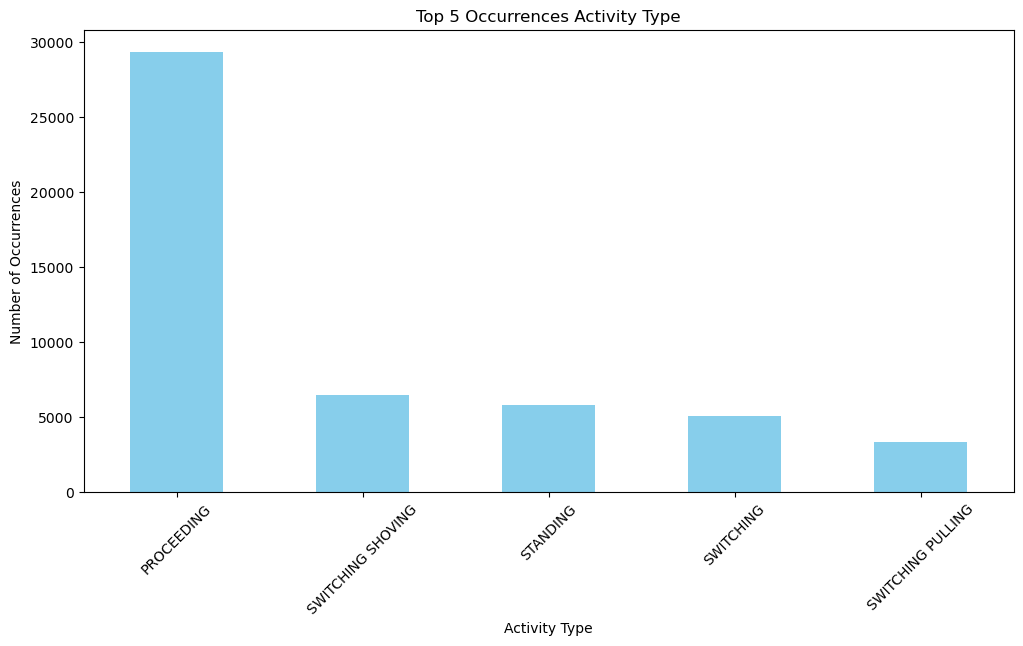

In [14]:
counts = data_cleaned_1['ActivityTypeID_DisplayEng'].value_counts().head(5)

# Plotting the bar chart for the top 5
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Occurrences Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

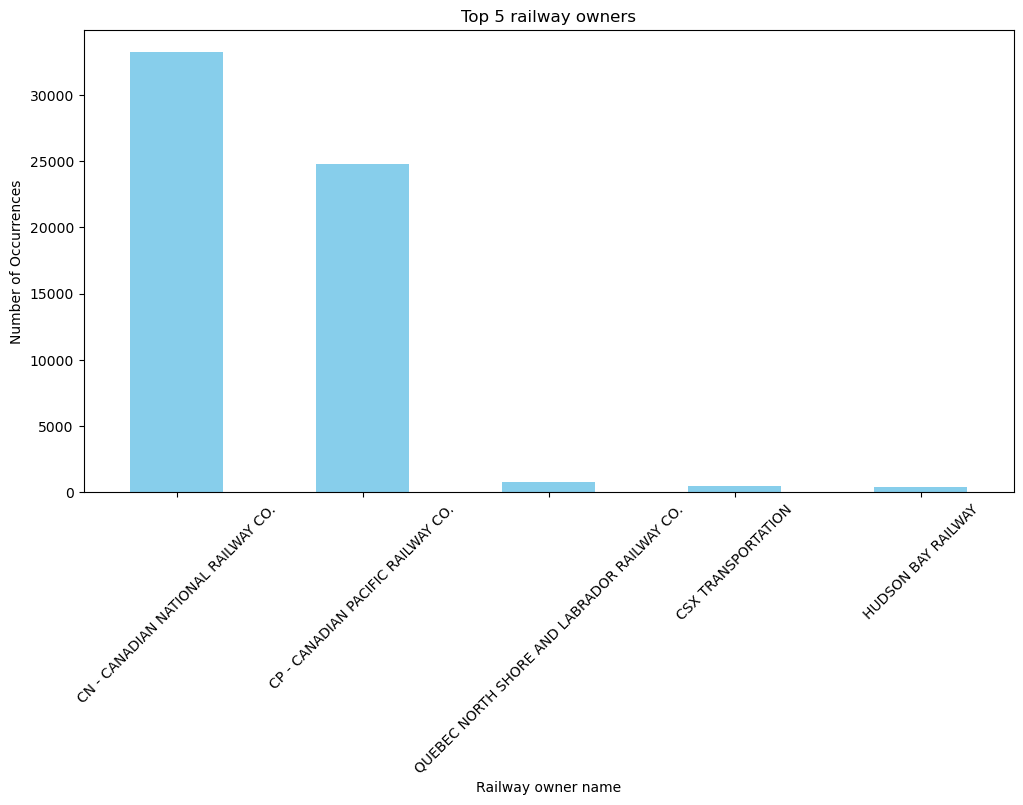

In [15]:
counts_owner = data_cleaned_1['SubdOwnerID_DisplayEng'].value_counts().head(5)

# Plotting the bar chart for the top 5
plt.figure(figsize=(12, 6))
counts_owner.plot(kind='bar', color='skyblue')
plt.title('Top 5 railway owners')
plt.xlabel('Railway owner name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

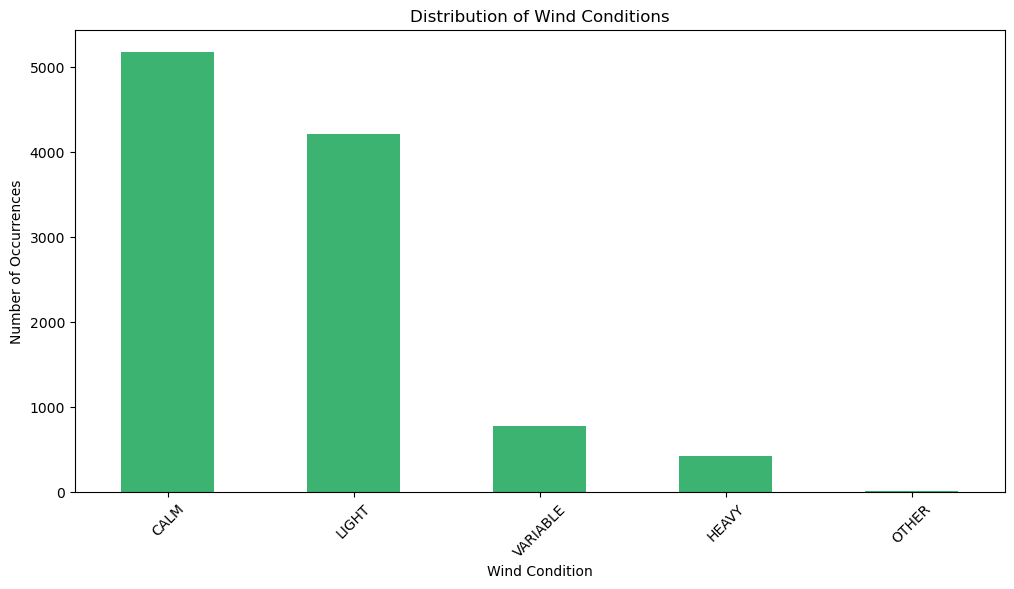

In [16]:
# Extracting and plotting all occurrences of 'WindID_DisplayEng'
wind_counts = data_cleaned_1['WindID_DisplayEng'].value_counts()
plt.figure(figsize=(12, 6))
wind_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Wind Conditions')
plt.xlabel('Wind Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


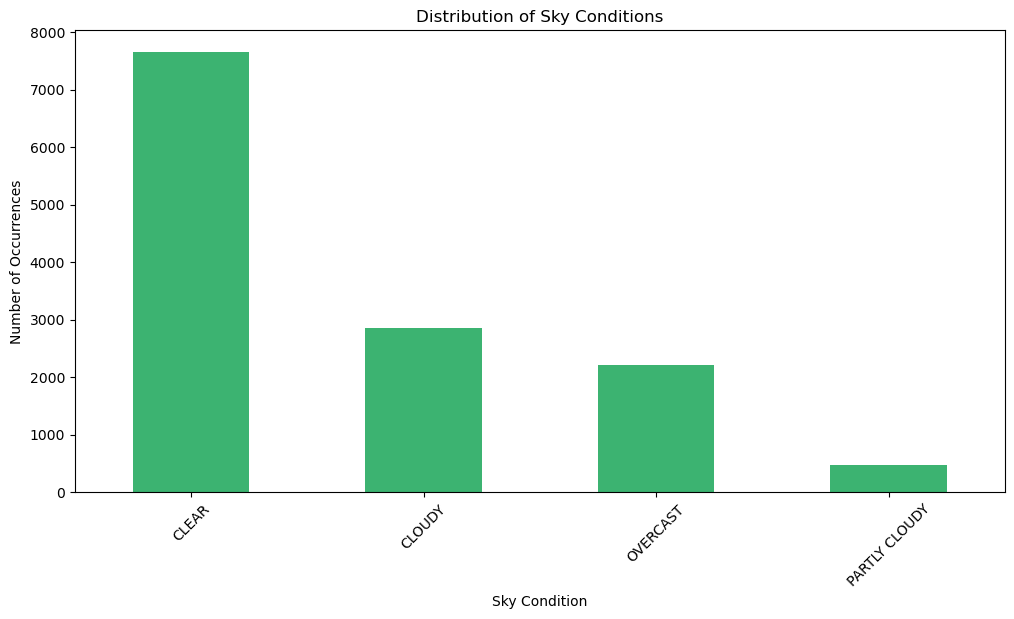

In [17]:
sky_counts = data_cleaned_1['SkyConditionID_DisplayEng'].value_counts()
plt.figure(figsize=(12, 6))
sky_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Sky Conditions')
plt.xlabel('Sky Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()



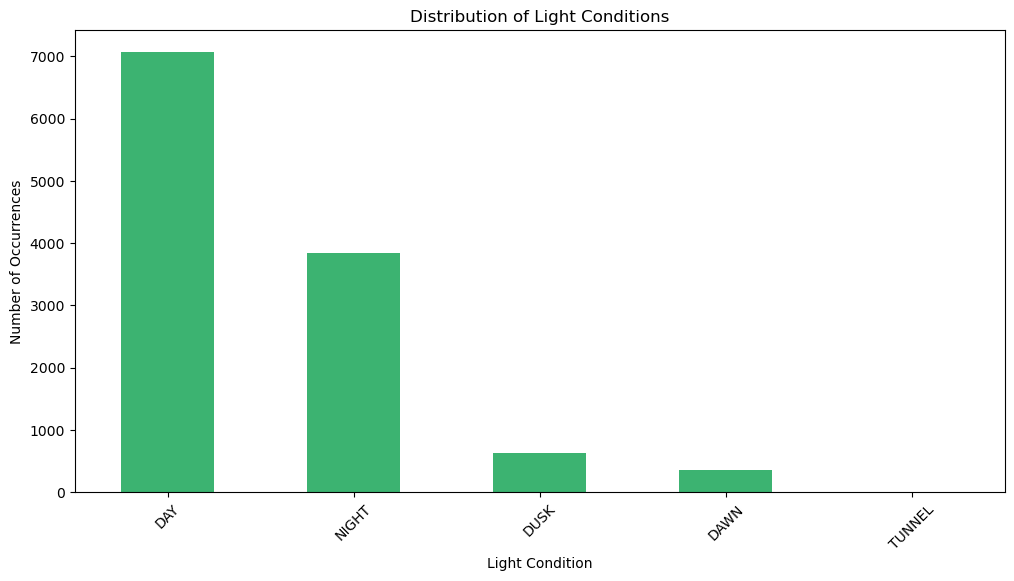

In [18]:
light_counts = data_cleaned_1['LightConditionID_DisplayEng'].value_counts()
plt.figure(figsize=(12, 6))
light_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Light Conditions')
plt.xlabel('Light Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


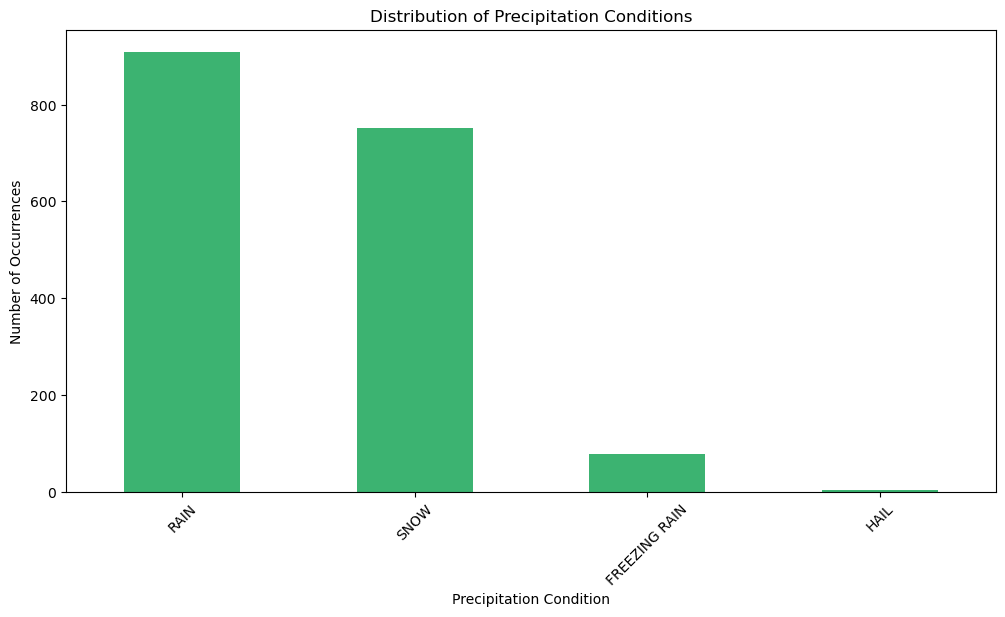

In [20]:
Prec_counts = data_cleaned_1['PrecipitationTypeID_DisplayEng'].value_counts()
plt.figure(figsize=(12, 6))
Prec_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Precipitation Conditions')
plt.xlabel('Precipitation Condition')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


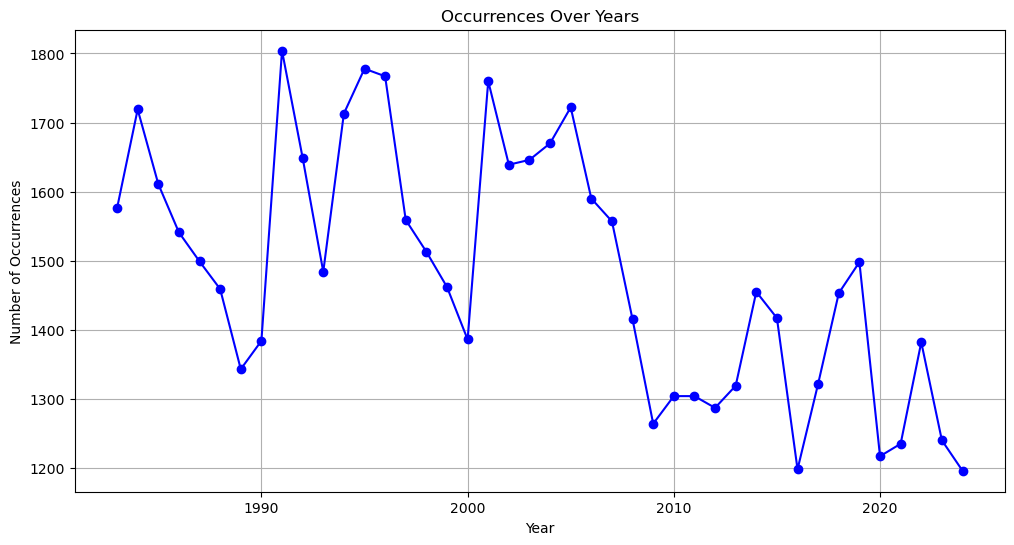

In [21]:
# Aggregating occurrences by 'OccYear' for a line graph
occurrences_by_year = data_cleaned_1['OccYear'].value_counts().sort_index()

# Filtering data to include only years up to 2024
occurrences_by_year = occurrences_by_year[occurrences_by_year.index <= 2024]

# Plotting the line graph for occurrences over years with customized x-axis ticks
plt.figure(figsize=(12, 6))
occurrences_by_year.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Occurrences Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()
